In [114]:
import numpy as np
import pandas as pd
import requests

In [115]:
df = pd.read_csv('/content/weather.csv')

In [116]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,Yes
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,Yes
2,13.7,23.4,NW,85.0,69,1007.2,20.2,Yes
3,13.3,15.5,NW,54.0,56,1007.0,14.1,Yes
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,No
...,...,...,...,...,...,...,...,...
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,No
362,7.1,28.4,N,48.0,22,1016.9,28.2,No
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,No
364,12.5,26.9,NW,46.0,39,1016.2,25.9,No


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   WindGustDir    363 non-null    object 
 3   WindGustSpeed  364 non-null    float64
 4   Humidity       366 non-null    int64  
 5   Pressure       366 non-null    float64
 6   Temp           366 non-null    float64
 7   RainTomorrow   366 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 23.0+ KB


In [118]:
df.describe()

,MinTemp,MaxTemp,WindGustSpeed,Humidity,Pressure,Temp
count,366.000000,366.000000,364.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,39.840659,44.519126,1016.810383,19.230874
std,6.025800,6.690516,13.059807,16.850947,6.469422,6.640346
min,-5.300000,7.600000,13.000000,13.000000,996.800000,5.100000
25%,2.300000,15.025000,31.000000,32.250000,1012.800000,14.150000
50%,7.450000,19.650000,39.000000,43.000000,1017.400000,18.550000
75%,12.500000,25.500000,46.000000,55.000000,1021.475000,24.000000
max,20.900000,35.800000,98.000000,96.000000,1033.200000,34.500000


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

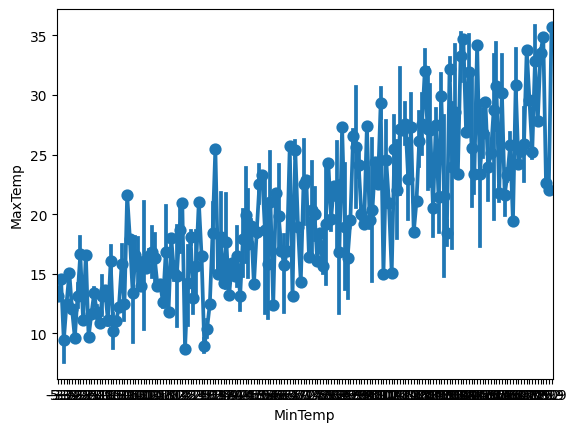

In [120]:
sns.pointplot(x='MinTemp',y='MaxTemp',data=df)
plt.show()

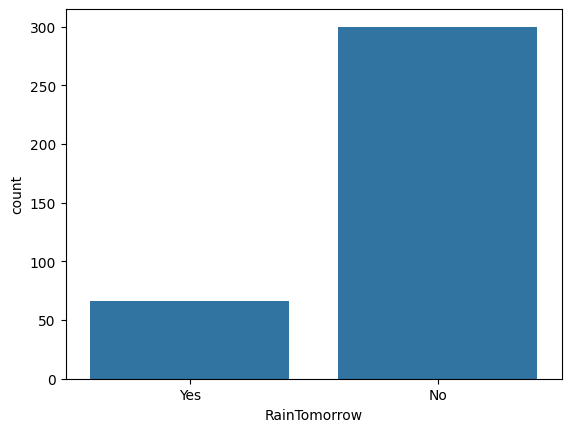

In [121]:
sns.countplot(x='RainTomorrow',data=df)
plt.show()

In [122]:
API_KEY = 'f6c53be4635a8e9567ce469338e955cd'

In [123]:
BASE_URL='https://api.openweathermap.org/data/2.5/'

## Fetching weather data

In [124]:
def get_curr_weather(city):
  url = f"{BASE_URL}weather?q={city}&appid={API_KEY}&units=metric"   # constructing api req url
  response = requests.get(url)                                       # send req to api
  data = response.json()
  return {
      'city':data['name'],
      'current_temp':round(data['main']['temp']),             # data['main'] to access particular part of data
      'feels_like': round(data['main']['feels_like']),
      'humidity': round(data['main']['humidity']),
      'temp_min': round(data['main']['temp_min']),
      'temp_max': round(data['main']['temp_max']),
      'description': data['weather'][0]['description'],        # provide textual descr. of weather
      'country': data['sys']['country'],
      'wind_gust_dir': data['wind']['deg'],
      'pressure': data['main']['pressure'],
      'wind_gust_speed': data['wind']['speed']
  }

## read historical data

In [125]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,Yes
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,Yes
2,13.7,23.4,NW,85.0,69,1007.2,20.2,Yes
3,13.3,15.5,NW,54.0,56,1007.0,14.1,Yes
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,No
...,...,...,...,...,...,...,...,...
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,No
362,7.1,28.4,N,48.0,22,1016.9,28.2,No
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,No
364,12.5,26.9,NW,46.0,39,1016.2,25.9,No


In [126]:
from datetime import datetime,timedelta

In [127]:
def read_data(file_name):
  df =pd.read_csv(file_name)
  df =df.dropna()   #removing rows with missing val
  df = df.drop_duplicates()
  return df

In [128]:
df

,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,Humidity,Pressure,Temp,RainTomorrow
0,8.0,24.3,NW,30.0,29,1015.0,23.6,Yes
1,14.0,26.9,ENE,39.0,36,1008.4,25.7,Yes
2,13.7,23.4,NW,85.0,69,1007.2,20.2,Yes
3,13.3,15.5,NW,54.0,56,1007.0,14.1,Yes
4,7.6,16.1,SSE,50.0,49,1018.5,15.4,No
...,...,...,...,...,...,...,...,...
361,9.0,30.7,NNW,76.0,15,1010.8,30.0,No
362,7.1,28.4,N,48.0,22,1016.9,28.2,No
363,12.5,19.9,ESE,43.0,47,1022.8,18.3,No
364,12.5,26.9,NW,46.0,39,1016.2,25.9,No


## preprocessing the data for training

## Splitting Data & defining feature & target variable

In [129]:
from sklearn.preprocessing import LabelEncoder         #convert categorical to numerical data
from sklearn.model_selection import train_test_split

In [130]:
#  encoding RainTomorrow in the preprocessing step for setting up y for training, but using the modified data to extract x, which might be causing confusion when training the model.

In [131]:
# def preprocess_data(data):
#   le = LabelEncoder()
#   data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
#   data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

#   x = data[['MinTemp','MaxTemp','WindGustDir','WindGustSpeed','Humidity','Pressure','Temp']]
#   y = data['RainTomorrow']
#   return x,y,le

In [132]:
def preprocess_data(data):
  le = LabelEncoder()
  data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
  y = le.fit_transform(data['RainTomorrow'])

  x = data[['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'Humidity', 'Pressure', 'Temp']]
  print(f"Training features: {x.columns.tolist()}")

  return x,y ,le

## Training the model

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [134]:

def train_rain_prediction_model(x,y):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
  model = RandomForestClassifier(n_estimators=97, random_state=42)
  model.fit(x_train,y_train)

  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  f1_score_of_model = f1_score(y_test,y_pred)

  print(f"Accuracy: {accuracy}\n")
  print(f"F1 Score: {f1_score_of_model}\n")
  print((f"Classification Report:{classification_report(y_test,y_pred)}"))

  return model

### to predict future temp and humidity we need regression helps us predict continuos values  

## Prepare Regression Data

In [149]:
df['WindGustSpeed']

,WindGustSpeed
0,30.0
1,39.0
2,85.0
3,54.0
4,50.0
...,...
361,76.0
362,48.0
363,43.0
364,46.0


In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
def prepare_regression_data(data,feature):     # feature specifies col name
  x,y =[],[]                                   # x will store feature var, y target we want to predict
  for i in range(len(data)-1):
    x.append(data[feature].iloc[i])            # x has data val = 70,72,74,76,78

    y.append(data[feature].iloc[i+1])          # y = 72,74,76,78  n-1 next data points for prediction

  x = np.array(x).reshape(-1,1)              # convert x and y to numpy arrays x to 2d array with one col format required for regression models
  y = np.array(y)
  return x,y

## Traing Regression Model

In [137]:
def train_regression_model(x,y):
  model = RandomForestRegressor(n_estimators=100,random_state=42)
  model.fit(x,y)
  return model


NameError: name 'x' is not defined

## Predicting Future weather

### predicting from trained regression model for current weather

In [138]:
def weather_prediction(model,curr_data):
  predictions = [curr_data]

  for i in range(5):
    next_val = model.predict(np.array([predictions[-1]]))

    predictions.append(next_val[0])

  return predictions[1:]


In [148]:
df['WindGustDir'].unique()

array(['NW', 'ENE', 'SSE', 'SE', 'E', 'S', 'N', 'WNW', 'ESE', 'NE', 'NNE',
       'NNW', 'SW', 'W', 'WSW', 'SSW', nan], dtype=object)

In [139]:
import pytz

In [140]:
from re import T
def predict_weather():
  city = input("Enter city name: ")
  curr_weather = get_curr_weather(city)


  historical_data = read_data('/content/weather.csv')
  x,y,le = preprocess_data(historical_data)
  # x,y = split_data(historical_data)
  rain_model = train_rain_prediction_model(x,y)

  # mapping wind direction to compass points

  wind_deg = curr_weather['wind_gust_dir'] % 360   # wind_direction_degree ensuresing within 0 to 360 degrees

  #compass direction along with range of degrees associated with that direction
  compass_points = [
      ("N",0,11.25), ("NNE",11.25,33.75), ("NE",33.75,56.25),
      ("ENE",56.25,78.75), ("E",78.75,101.25), ("ESE",101.25,123.75),
      ("SE",123.75,146.25), ("SSE",146.25,168.75), ("S",168.75,191.25),
      ("SSW",191.25,213.75), ("SW",213.75,236.25), ("WSW",236.25,258.75),
      ("W",258.75,281.25), ("WNW",281.25,303.75), ("NW",303.75,326.25),
      ("NNW",326.25,348.75)
  ]

  # we find compass directions that matches wind degrees

  # for point in compass_points:
  #   if point[1] <= wind_deg <= point[2]:
  #     curr_weather['WindGustDir'] = point[0]
  #     break

  for point, start, end in compass_points:
      if start <= wind_deg < end:
        compass_direction = point
        break

  # we need to encode compass direction in a lang our model can understand

  if compass_direction in le.classes_:
    compass_direction_encoded = le.transform([compass_direction])[0]
  else:
    compass_direction_encoded = -1


  curr_weather_data = {
      'MinTemp': curr_weather['temp_min'],
      'MaxTemp': curr_weather['temp_max'],
      'WindGustDir': compass_direction_encoded,
      'WindGustSpeed': curr_weather['wind_gust_speed'],           # to use this we need it in categorical form
      'Humidity': curr_weather['humidity'],
      'Pressure': curr_weather['pressure'],
      'Temp': curr_weather['current_temp'],

  }

  # rainfall prediction

  curr_df = pd.DataFrame([curr_weather_data])



  rain_predict = rain_model.predict(curr_df)[0]

  # preparing  and training regression model for temp and humidity

  x_temp, y_temp = prepare_regression_data(historical_data,'Temp')
  x_humidity, y_humidity = prepare_regression_data(historical_data,'Humidity')

  temp_model = train_regression_model(x_temp,y_temp)
  humidity_model = train_regression_model(x_humidity,y_humidity)


  # predict future temp and humidity

  # future_temp = weather_prediction(temp_model,curr_weather_data['Temp'])
  # future_humidity = weather_prediction(humidity_model,curr_weather_data['Humidity'])

  future_temp = temp_model.predict([[curr_weather_data['Temp']]] * 5)
  future_humidity = humidity_model.predict([[curr_weather_data['Humidity']]] * 5)


  # preparing time series future prediction

  timezone = pytz.timezone('Asia/Kolkata')
  curr_time = datetime.now(timezone)
  next_hr = curr_time + timedelta(hours=1)
  next_hr = next_hr.replace(minute=0, second=0, microsecond =0 )

  future_time = [(next_hr + timedelta(hours=i)).strftime("%H:00") for i in range(5)]

  print(f"City: {city},{curr_weather['country']}")
  print(f"current Temperature:{curr_weather['current_temp']}")
  print(f"Feels Like: {curr_weather['feels_like']}")
  print(f"Minimum Temp: {curr_weather['temp_min']}")
  print(f"Maximum Temp: {curr_weather['temp_max']}")
  print(f"Humidity: {curr_weather['humidity']} %")
  print(f"Weather Prediction: {curr_weather['description']}")
  print(f"Rain Prediction: {'Yes' if rain_predict else 'No'}")



  print(f"\n Future Temperature Predictions")

  for time, temp in zip(future_time, future_temp):
    print(f"{time}: {round(temp, 1)}*C")

  print(f"\n Future Humidity Predictions")

  for time, humidity in zip(future_time ,future_humidity):
    print(f"{time}: {round(humidity,1)}%")

In [150]:
predict_weather()

Enter city name: karnataka
Training features: ['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'Humidity', 'Pressure', 'Temp']
Accuracy: 0.863013698630137

F1 Score: 0.5833333333333334

Classification Report:              precision    recall  f1-score   support

           0       0.86      0.98      0.92        57
           1       0.88      0.44      0.58        16

    accuracy                           0.86        73
   macro avg       0.87      0.71      0.75        73
weighted avg       0.86      0.86      0.84        73

City: karnataka,IN
current Temperature:34
Feels Like: 32
Minimum Temp: 34
Maximum Temp: 34
Humidity: 25 %
Weather Prediction: overcast clouds
Rain Prediction: No

 Future Temperature Predictions
15:00: 31.2*C
16:00: 31.2*C
17:00: 31.2*C
18:00: 31.2*C
19:00: 31.2*C

 Future Humidity Predictions
15:00: 38.0%
16:00: 38.0%
17:00: 38.0%
18:00: 38.0%
19:00: 38.0%


In [142]:
predict_weather()

Enter city name: mumbai
Training features: ['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'Humidity', 'Pressure', 'Temp']
Accuracy: 0.863013698630137

F1 Score: 0.5833333333333334

Classification Report:              precision    recall  f1-score   support

           0       0.86      0.98      0.92        57
           1       0.88      0.44      0.58        16

    accuracy                           0.86        73
   macro avg       0.87      0.71      0.75        73
weighted avg       0.86      0.86      0.84        73

City: mumbai,IN
current Temperature:29
Feels Like: 31
Minimum Temp: 29
Maximum Temp: 29
Humidity: 63 %
Weather Prediction: haze
Rain Prediction: Yes

 Future Temperature Predictions
15:00: 22.1*C
16:00: 22.1*C
17:00: 22.1*C
18:00: 22.1*C
19:00: 22.1*C

 Future Humidity Predictions
15:00: 57.7%
16:00: 57.7%
17:00: 57.7%
18:00: 57.7%
19:00: 57.7%


In [143]:
predict_weather()

Enter city name: rajkot
Training features: ['MinTemp', 'MaxTemp', 'WindGustDir', 'WindGustSpeed', 'Humidity', 'Pressure', 'Temp']
Accuracy: 0.863013698630137

F1 Score: 0.5833333333333334

Classification Report:              precision    recall  f1-score   support

           0       0.86      0.98      0.92        57
           1       0.88      0.44      0.58        16

    accuracy                           0.86        73
   macro avg       0.87      0.71      0.75        73
weighted avg       0.86      0.86      0.84        73

City: rajkot,IN
current Temperature:36
Feels Like: 33
Minimum Temp: 36
Maximum Temp: 36
Humidity: 15 %
Weather Prediction: clear sky
Rain Prediction: No

 Future Temperature Predictions
15:00: 33.1*C
16:00: 33.1*C
17:00: 33.1*C
18:00: 33.1*C
19:00: 33.1*C

 Future Humidity Predictions
15:00: 21.5%
16:00: 21.5%
17:00: 21.5%
18:00: 21.5%
19:00: 21.5%
